# CX-CCX algebra 

The **CX** gate and the **CCX** are the famous multi-qubit gates for quantum computing. For each of these gates in a quantum circuit, the error rates may increase very drastically. As sofisticated quantum circuits
will consist of a large number these controlled gates, we would like to be able to compose it with an efficient number of them. This tutorial is about a little piece of mathematics that can sometimes be helpful when dealing with many CX and CCX in the same circuit.

Please run the preamble before continuing:

In [1]:
from qiskit import QuantumCircuit,QuantumRegister,transpile
from qiskit.circuit.library import QFT
from qiskit.tools.visualization import circuit_drawer

## Preamble: X gate

CX stands for controlled-$X$ and CCX stands for controlled-controlled-$X$, where *X* is the Pauli operator given by 

$$X=\begin{bmatrix}0 & 1 \\ 1& 0\end{bmatrix},$$

also called the bit-flip operator as $X|0\rangle=|1\rangle$ and $X|1\rangle=|0\rangle$. Note that, doing two bit flips cancels the operation as

$$X^2=I=\begin{bmatrix}1 & 0 \\ 0& 1\end{bmatrix}.$$

The $X$ operator is represented in a quantum circuit in the following way:

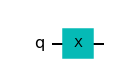

In [2]:
qc=QuantumCircuit(1) #creates a single qubit circuit
qc.x(0) #adds a x gate
qc.draw('mpl') #draws the circuit

The $X$ gate is also called the NOT gate in analogy with classical circuits, where it is represented as "$\lnot$" and $\lnot0=1$ and $\lnot 1 = 0$. So in this sense $X|q \rangle=|\lnot q \rangle$, where $q=0,1$.


## CX gate
$\newcommand{\CX}{\operatorname{CX}}$
The CX is the controlled version of the $X$ gate, also called a CNOT (controlled-NOT) gate. This gate is a two qubit gate that performs a bit flip on a target qubit $q_t$ depending on the state of a control qubit $q_c$. If the control qubit is in $q_c=0$, then $\CX(c;t)|q_c=0,q_t\rangle=|0,q_t\rangle$. If the control qubit is $q_c=1$, then it performs a bit flip on the target qubit such that $\CX(c;t)|q_c=1,q_t\rangle=|0,\lnot q_t\rangle$. The matrix can have different forms, it is usually written as 

$$\CX(0;1)=\begin{bmatrix}1 & 0 & 0& 0\\0 & 1 & 0& 0 \\ 0 & 0 & 0& 1 \\ 0 & 0 & 1& 0 \end{bmatrix}$$

or 

$$\CX(1;0)=\begin{bmatrix}1 & 0 & 0& 0\\0 & 0 & 0& 1 \\ 0 & 0 & 1& 0 \\ 0 & 1 &0 & 0 \end{bmatrix},$$

depending on the ordering of the qubits. And similar to the $X$ gate, appliying it twice on the same qubits,

$$[\CX(c;t)]^2=\CX(c;t)\CX(c;t)=\begin{bmatrix}1 & 0 & 0& 0\\0 & 1 & 0& 0 \\ 0 & 0 & 1& 0 \\ 0 & 0 & 0 & 1 \end{bmatrix}=I\otimes I,$$
gives back the identity. 

The CX gate is usually represented in quantum circuit as

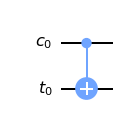

In [81]:
control=QuantumRegister(1,name="c") #register for control qubit
target=QuantumRegister(1,name="t") #register for target qubit
qc=QuantumCircuit(control,target) #creates a two qubit circuit
c=control[0]
t=target[0]
qc.cx(c,t) 
qc.draw('mpl') #draws the circuit

here `c0` is the control qubit and `t0` is the target qubit.

The CX gate is sometimes called the quantum XOR gate, as it behaves similar to the logic exclusive OR (XOR), represented as $\oplus$, which acts on two bits $b_1$ and $b_2$ such that $b_1\oplus b_2 = b_1+b_2 \pmod 2$.

<table style="width:20%">
<caption>XOR truth table</caption>
<tr>
<th>$b_1$</th>
<th>$b_2$</th>
<th>$b_1\oplus b_2$</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>1</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>0</td>
</tr>    

</table>

In that way we can write the CX operation the following way $\CX(c;t)|q_c,q_t\rangle =|q_c,q_t\oplus q_c\rangle $. The CX gate is one of the most important gates as it is one of the simplest two-qubit gates that can generate entangled states.

## CCX gate
The CCX gate is three qubit controlled gate and performs a bit flip on a target qubit controlled by two qubits. It is also called the Toffoli gate, named after Tomasso Toffoli one of the founders of classical reversible computation. Quantum computing is a special case of reversible computation, as any classical reversible gate can be implemented in a quantum circuit. The gate is represented like this

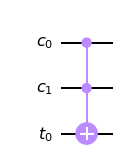

In [3]:
control=QuantumRegister(2,name="c") #register for control qubit
target=QuantumRegister(1,name="t") #register for target qubit
qc=QuantumCircuit(control,target) #creates a three qubit circuit
c0=control[0]
c1=control[1]
t=target[0]
qc.ccx(c0,c1,t)  #ccx gate
qc.draw('mpl') #draws the circuit

where `c0` and `c1` are the control qubits and `t` is the target qubit. It makes a bit flip on the target qubit if both `c0` and `c1` are equal to 1.
In matrix form we may write 

$\newcommand{\CCX}{\operatorname{CCX}}$
$$\CCX(c_0,c_1;t)=\begin{bmatrix}1 & 0 & 0& 0 & 0 & 0 & 0& 0\\0 & 1 & 0& 0 & 0 & 0 & 0& 0 \\ 0 & 0 & 1& 0 & 0 & 0 & 0& 0 \\ 0 & 0 & 0& 1 & 0 & 0 & 0& 0 \\ 0 & 0 & 0& 0 & 1 & 0 & 0& 0\\0 & 0 & 0& 0 & 0 & 1 & 0& 0 \\ 0 & 0 & 0& 0 & 0 & 0 & 0& 1 \\ 0 & 0 & 0& 0 & 0 & 0 & 1& 0 \end{bmatrix},$$

but again, be careful, this form depends on the ordering of the qubits. Analogous to the $X$ and CX, we have that $[\CCX(c_0,c_1;t)]^2=\CCX(c_0,c_1;t)\CCX(c_0,c_1;t)=I\otimes I \otimes I$.

As the CCX gate only acts on the target when $c_0$ AND $c_1$ are 1, this gate is the reversible version of the usual logic AND, that we represent by "$\cdot$" as it works like the usual product.

<table style="width:20%">
<caption>AND truth table</caption>
<tr>
<th>$c_1$</th>
<th>$c_2$</th>
<th>$c_1\cdot c_2$</th>
</tr>

<tr>
<td>0</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>0</td>
<td>1</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>0</td>
<td>0</td>
</tr>

<tr>
<td>1</td>
<td>1</td>
<td>1</td>
</tr>    

</table>

In this way we can write the CCX operation as $\CCX(c_0,c_1;t)|q_{c1},q_{c2},q_t\rangle=|q_{c1},q_{c2},q_t\oplus q_{c1}\cdot q_{c2}\rangle$. 

It can be showed that a Toffoli gate can be written using single-qubit gates and CX gates, with a minimum of 6 CX gates, for example:

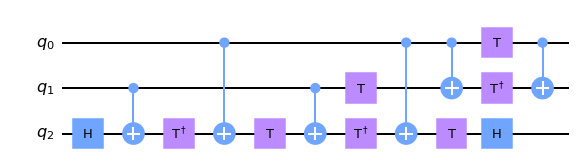

In [83]:
qc=QuantumCircuit(3) 
qc.h(2)
qc.cx(1,2)
qc.tdg(2)
qc.cx(0,2)
qc.t(2)
qc.cx(1,2)
qc.tdg(2)
qc.cx(0,2)
qc.t([1,2])
qc.h(2)
qc.cx(0,1)
qc.t(0)
qc.tdg(1)
qc.cx(0,1)
qc.draw('mpl')

where $H$ is the Hadamard gate and $T$ makes a rotation of $\pi/4$ on the $z$-axis of the Bloch sphere.

CCX can be very unnatural and costly to implement but it has some advantages. CCX is a universal reversible circuit gate, in the sense that any classical logic operation can be written using only CCXs. In the same sense, any quantum gate can be decomposed into Hadamard gates and CCX gates, forming a universal set of quantum gates. But CX and Hadamard gates are not an universal set. 
Additionally, some three qubit entangled states can also be easily written using CCX gates.

## CX-CCX algebra

An messy circuit with many CCX and CX could look like this:

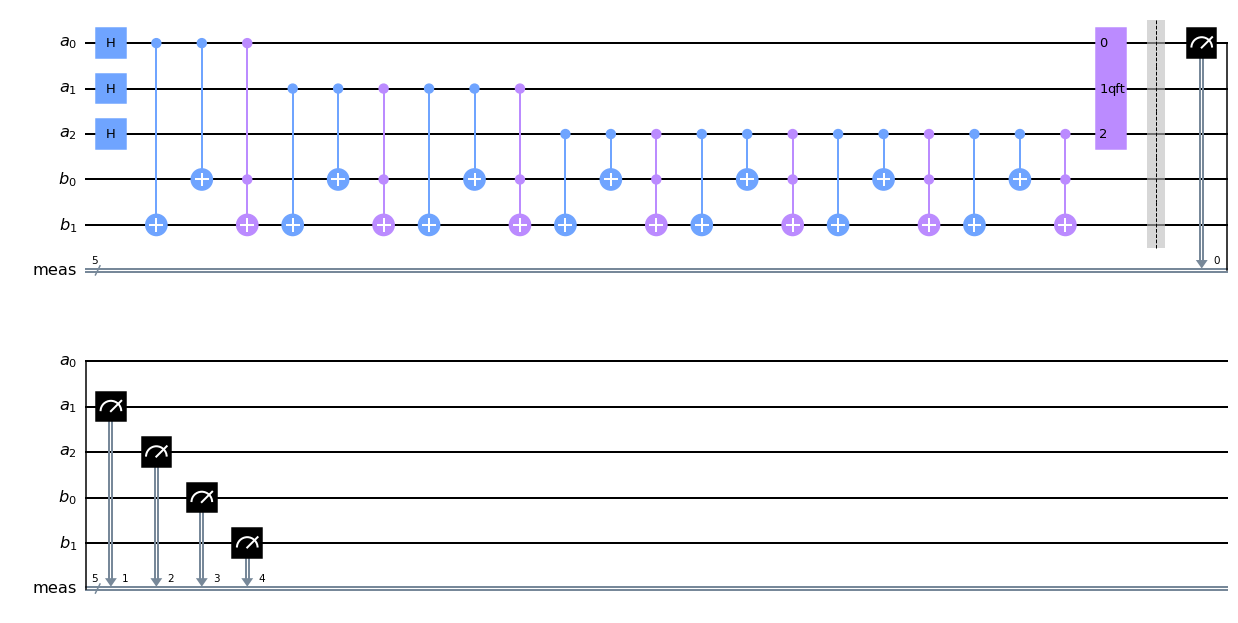

In [6]:
a=QuantumRegister(3,name="a") #qubits a
b=QuantumRegister(2,name="b") #qubits b
shor35=QuantumCircuit(a,b) #Shor algorithm circuit

shor35.h(a)

#Define subcircuit
qc=QuantumCircuit(a,b) #sub circuit with many ccx and cx
qc.cx(a[0],b[1])
qc.cx(a[0],b[0])
qc.ccx(a[0],b[0],b[1])

qc.cx(a[1],b[1])
qc.cx(a[1],b[0])
qc.ccx(a[1],b[0],b[1])
qc.cx(a[1],b[1])
qc.cx(a[1],b[0])
qc.ccx(a[1],b[0],b[1])

qc.cx(a[2],b[1])
qc.cx(a[2],b[0])
qc.ccx(a[2],b[0],b[1])
qc.cx(a[2],b[1])
qc.cx(a[2],b[0])
qc.ccx(a[2],b[0],b[1])
qc.cx(a[2],b[1])
qc.cx(a[2],b[0])
qc.ccx(a[2],b[0],b[1])
qc.cx(a[2],b[1])
qc.cx(a[2],b[0])
qc.ccx(a[2],b[0],b[1])

#Assemble
shor35=shor35+qc
shor35.append(QFT(3, inverse=True), a) #Quantum Fourier transform
shor35.measure_all()

shor35.draw('mpl')

This example is a circuit that performs Shor's algorithm to factorize $n=35$. As you can see it uses way too many CX and CCX gates in the middle of the circuit. Let us count how many CXs are needed in the middle after transpilation:

In [7]:
transpiled = transpile(qc, basis_gates=['cx','u'])
transpiled.count_ops()['cx']

56

The following theorem can help us to maximally reduce the number of multiqubit gates.

### Theorem
The following two circuits are equivalent:

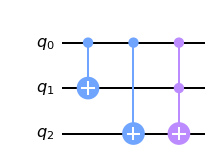

In [8]:
qc1=QuantumCircuit(3) #creates a three qubit circuit
qc1.cx(0,1)
qc1.cx(0,2)
qc1.ccx(0,1,2) 
circuit_drawer(qc1,output='mpl')

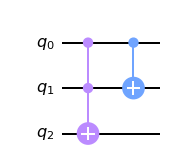

In [9]:
qc2=QuantumCircuit(3) #creates a three qubit circuit
qc2.ccx(0,1,2) 
qc2.cx(0,1)
circuit_drawer(qc2,output='mpl') 

$\newcommand{\CCX}{\operatorname{CCX}}$
which basically says that commuting a CCX with a CX that targets one of the control qubits of the CCX produces an additional CX. Formally, in matrix order, we have
$$\CCX(i,j;k)\CX(i;k)\CX(i;j)=\CX(i;j)\CCX(i,j;k)$$
with integers $i\neq j\neq k$.

### Proof
A quick proof is the following. Start by calculating the left hand side
$$\CCX(i,j;k)\CX(i;k)\CX(i;j)|q_i,q_j,q_k\rangle=\CCX(i,j;k)|q_i ,q_j\oplus q_i ,q_k\oplus q_i\rangle=|q_i ,q_j\oplus q_i ,q_k\oplus q_i\oplus q_i(q_j\oplus q_i)\rangle$$
$$=|q_i,q_j\oplus q_i, q_k\oplus q_i\oplus q_iq_j \oplus q_i^2\rangle=|q_i,q_j\oplus q_i, q_k\oplus q_iq_j\rangle$$
where we used that $q_i^2=q_i$ and $q_i\oplus q_i = 0$ and we shortened $q_i\cdot q_j=q_iq_j$. 

Now calculate the right hand side:
$$\CX(i;j)\CCX(i,j;k)|q_i,q_j,q_k\rangle=\CX(i;j)|q_i,q_j,q_k\oplus q_iq_j\rangle=|q_i,q_j\oplus q_i,q_k\oplus q_iq_j\rangle,$$
which finishes the proof.

### List of identities
Here is a list of useful identities that can be found using above procedure

* Identity $X^2=I$
* Two qubit identity $[\CX(c;t)]^2=I\otimes I$
* Three qubit identity $[\CCX(c_1,c_2;t)]^2=I\otimes I\otimes I$
* CXs with the same control qubit commute $\CX(c;t_1)\CX(c;t_2)=\CX(c;t_2)\CX(c;t_1)$
* CX and CCX operation in same target commute $\CCX(i;t)\CX(i,j;t)=\CX(i;t)\CCX(i,j;t)$
* Three CCX simplify sometimes $\CCX(j,k;l)\CCX(i,j;k)\CCX(j,k;l)=\CCX(i,j;k)\CCX(i,j;l)$
* Three CX build a SWAP: $\CX(i;j)\CX(j;i)\CX(i;j)|q_i,q_j\rangle=|q_j,q_i\rangle$
* Theorem $\CCX(i,j;k)\CX(i;k)\CX(i;j)=\CX(i;j)\CCX(i,j;k)$
* Corollary $\CCX(i,j;k)\CX(j;k)\CX(j;i)=\CX(j;i)\CCX(i,j;k)$

### Conclusion
Using some of these identities we can reduce the messy Shor algorithm circuit into

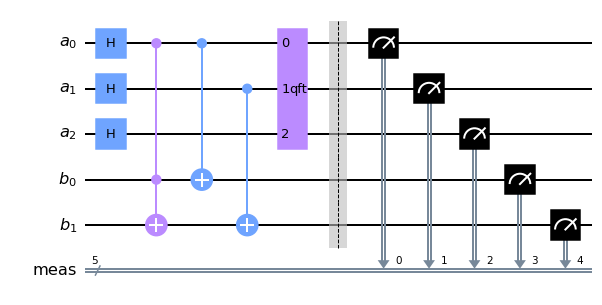

In [90]:
a=QuantumRegister(3,name="a") #qubits a
b=QuantumRegister(2,name="b") #qubits b
qc=QuantumCircuit(a,b)
shor35=QuantumCircuit(a,b)
shor35.h(a)

qc.ccx(a[0],b[0],b[1])
qc.cx(a[0],b[0])

qc.cx(a[1],b[1])

shor35=shor35+qc

shor35.append(QFT(3, inverse=True), a)
shor35.measure_all()

shor35.draw('mpl')

In [91]:
transpiled = transpile(qc, basis_gates=['cx','u'])
transpiled.count_ops()['cx']

6

almost 10 times less CX gates, which show how useful this identities can be.

## Further reading
* Cockett, J. R. B., and Cole Comfort. *The category TOF* arXiv:[1804.10360](https://arxiv.org/abs/1804.10360v4) (2018).
* Shi, Yaoyun. *Toffoli or control-not needs little help to do universal quantum computation* [quant-ph/0205115](https://arxiv.org/abs/quant-ph/0205115). 2002.
* Shende, Vivek V., and Igor L. Markov. *On the CNOT-cost of TOFFOLI gates* arXiv:[0803.2316](https://arxiv.org/abs/0803.2316) (2008).
* Nielsen, Michael A., and Isaac Chuang. *Quantum computation and quantum information*, Cambridge University Press (2000)

This tutorial was inspired by IBM Quantum Challenge 2021, exercice 2: https://github.com/qiskit-community/ibm-quantum-challenge-2021/tree/main/content/ex3

Thanks to Manuel Morgado and the StrasQC team for their support during the tournament. Created by Mauricio Gómez Viloria May, 2021.